In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Problem 1**

In [81]:
data_fiscal=pd.read_csv("/Users/apoorvakasoju/Downloads/Sdf16_1a.txt",sep="\t")


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [82]:
data_fiscal_cut=data_fiscal[(data_fiscal.TFEDREV > 0)][['STNAME','LEAID',"TFEDREV"]]

In [83]:
data_fiscal_cut["cut"]=(data_fiscal_cut["TFEDREV"]/data_fiscal['TFEDREV'].sum())*8340410870.7
data_fiscal_cut["after_cut"]=data_fiscal_cut["TFEDREV"]-data_fiscal_cut["cut"]
data_fiscal_cut.sort_values(by=["cut"],ascending=False,inplace=True)


In [85]:
data_fiscal_cut.sort_values(by=["cut"],ascending=False,inplace=True)

In [86]:
data_fiscal_cut[["STNAME","LEAID","cut"]].head(10)

,STNAME,LEAID,cut
11684,New York,3620580,260865150.0
1904,California,622710,163710000.0
3850,Illinois,1709930,118863000.0
3022,Florida,1200390,64727850.0
3038,Florida,1200870,46264050.0
16436,Texas,4823640,44093700.0
16242,Texas,4816230,43074150.0
3015,Florida,1200180,41743800.0
9784,Nevada,3200060,41644200.0
15038,Pennsylvania,4218990,40705350.0


In [87]:
data_fiscal_cut_g=data_fiscal_cut.groupby('STNAME',as_index=False)['cut'].sum()
data_fiscal_cut_g['prop']=data_fiscal_cut_g["cut"]/sum(data_fiscal_cut_g["cut"])

In [88]:
data_fiscal_cut_g.sort_values(by=['prop'],inplace=True,ascending=False)

In [89]:
def plot_bar_xy(data_fiscal_revenue,y_label,x_label,title,x_title,y_title):
    state_labels=data_fiscal_revenue[x_label].tolist()
    index = np.arange(len(state_labels[:10]))

    plt.bar(index, data_fiscal_revenue[y_label].tolist()[:10])
    plt.xlabel(x_title, fontsize=15)
    plt.ylabel(y_title, fontsize=15)
    plt.xticks(index, state_labels[:10], fontsize=10, rotation=30)
    plt.title(title)
    plt.show()

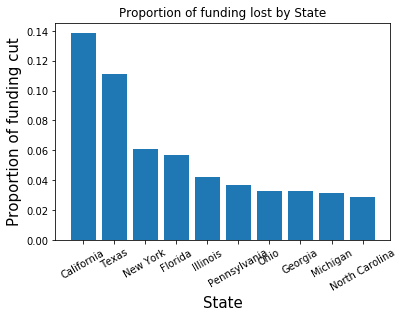

In [90]:
plot_bar_xy(data_fiscal_cut_g,"prop",'STNAME',"Proportion of funding lost by State","State","Proportion of funding cut")

_As we can see , states such as California,Texas,New York and Florida are among top states losing funding as part of funding cut ._

**Problem 2**

In [91]:
data_membership=pd.read_csv("/Users/apoorvakasoju/Downloads/ccd_lea_052_1516_w_1a_011717.csv",low_memory=False)

In [92]:
data_membership_s=data_membership[(data_membership.TOTAL > 0)][['STATENAME','LEAID','TOTAL','AM', 'AS','HI', 'BL', 'WH', 'HP', 'TR']]

In [93]:
data_membership_s['AM_PROP']=data_membership_s['AM']/data_membership_s['TOTAL']
data_membership_s['AS_PROP']=data_membership_s['AS']/data_membership_s['TOTAL']
data_membership_s['HI_PROP']=data_membership_s['HI']/data_membership_s['TOTAL']
data_membership_s['BL_PROP']=data_membership_s['BL']/data_membership_s['TOTAL']
data_membership_s['WH_PROP']=data_membership_s['WH']/data_membership_s['TOTAL']
data_membership_s['HP_PROP']=data_membership_s['HP']/data_membership_s['TOTAL']
data_membership_s['TR_PROP']=data_membership_s['TR']/data_membership_s['TOTAL']

In [94]:
fiscal_membership = data_membership_s.merge( data_fiscal_cut,on=['LEAID'],how='left')

In [95]:
fiscal_membership['has_cut'] = np.where(data_membership_s.LEAID.isin(data_fiscal_cut.LEAID), 'cut', 'no_cut')

In [96]:
all_races = {'BL': 'Black','AM': 'American Indian/Alaska Native','HP': 'Hawaiian Native/Pacific Islander','AS': 'Asian','HI': 'Hispanic','WH': 'White','TR': 'Two or More Races',
}

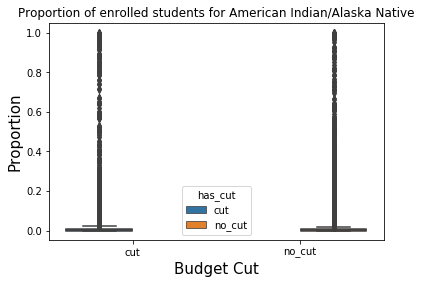

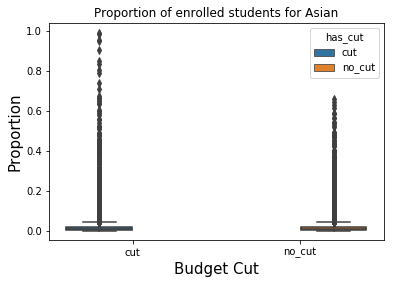

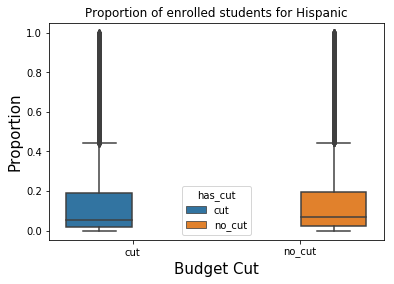

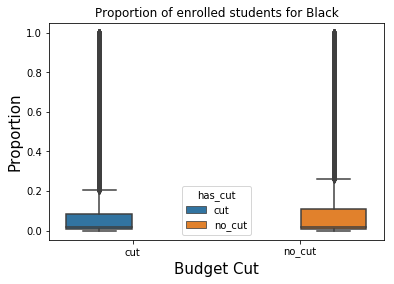

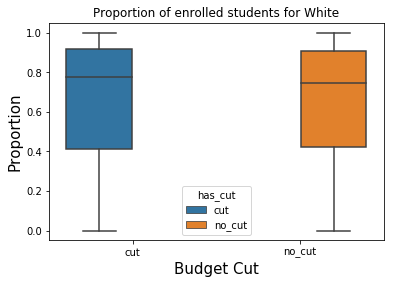

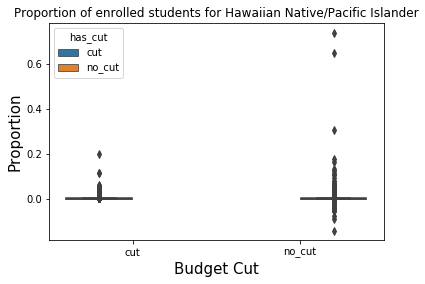

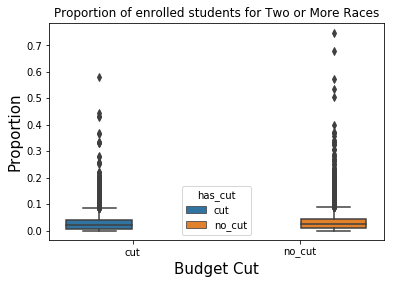

In [97]:
for each_race in ['AM', 'AS','HI', 'BL', 'WH', 'HP', 'TR']:
    prop_name=each_race+'_PROP'
    fig, ax = plt.subplots()
    sns.boxplot(x="has_cut", y=prop_name,hue="has_cut", data=fiscal_membership,ax =ax)  # RUN PLOT  
    plt.xlabel('Budget Cut', fontsize=15)
    plt.ylabel('Proportion', fontsize=15)
    plt.title('Proportion of enrolled students for '+all_races[each_race])
    plt.show()

    

_For all races, distrubitions look mostly similar or vary only slightly by proportion of enrolled students .For Asian population , few districts with no budget cut has lesser proprtion of students than  districts with cuts.
For the black population , districts under no budget cut have slightly high 75 percentile proportion than districts with budget cut._

**Problem 3**

In [98]:
disability_data=pd.read_csv('/Users/apoorvakasoju/Downloads/ccd_lea_002089_1516_w_1a_011717.csv')

In [99]:
disability_data.head(10)

,SURVYEAR,FIPST,STABR,STATENAME,SEANAME,LEAID,ST_LEAID,LEA_NAME,SPECED
0,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100002,210,Alabama Youth Services,24
1,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100005,101,Albertville City,267
2,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100006,048,Marshall County,430
3,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100007,158,Hoover City,861
4,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100008,169,Madison City,735
5,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100009,600,Al Inst Deaf And Blind,280
6,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100011,167,Leeds City,171
7,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100012,115,Boaz City,120
8,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100013,205,Trussville City,213
9,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100015,602,SafetyNet Academy,30


In [100]:
fiscal_membership=fiscal_membership[(fiscal_membership.TOTAL>0)]

In [101]:
disability_fiscal=fiscal_membership.merge(disability_data,on='LEAID',how='left')

In [102]:
disability_fiscal['SPECED'].fillna(0, inplace=True)

In [103]:
disability_fiscal=disability_fiscal[(disability_fiscal.TOTAL>0) & (disability_fiscal.SPECED>0)]
disability_fiscal=disability_fiscal.assign(disability_prop=lambda x: disability_fiscal.SPECED/disability_fiscal.TOTAL)

In [104]:
disability_fiscal.head(10)

,STATENAME_x,LEAID,TOTAL,AM,AS,HI,BL,WH,HP,TR,...,has_cut,SURVYEAR,FIPST,STABR,STATENAME_y,SEANAME,ST_LEAID,LEA_NAME,SPECED,disability_prop
0,ALABAMA,100005,5214,14,17,2289,152,2619,4,119,...,cut,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,101,Albertville City,267,0.051208
1,ALABAMA,100006,5635,26,17,1160,50,4331,2,49,...,cut,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,048,Marshall County,430,0.076309
2,ALABAMA,100007,13910,10,931,1008,3541,8131,14,275,...,cut,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,158,Hoover City,861,0.061898
3,ALABAMA,100008,10011,62,862,439,2042,6186,27,393,...,cut,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,169,Madison City,735,0.073419
4,ALABAMA,100011,1905,2,13,241,433,1148,5,63,...,cut,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,167,Leeds City,171,0.089764
5,ALABAMA,100012,2310,9,15,639,28,1535,11,73,...,cut,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,115,Boaz City,120,0.051948
6,ALABAMA,100013,4456,7,100,54,487,3741,0,67,...,cut,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,205,Trussville City,213,0.047801
7,ALABAMA,100030,3102,1,29,177,1211,1609,2,73,...,cut,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,102,Alexander City,310,0.099936
8,ALABAMA,100060,1745,3,26,34,561,1085,0,36,...,cut,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,104,Andalusia City,155,0.088825
9,ALABAMA,100090,2099,1,2,60,1893,108,0,35,...,cut,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,105,Anniston City,143,0.068128


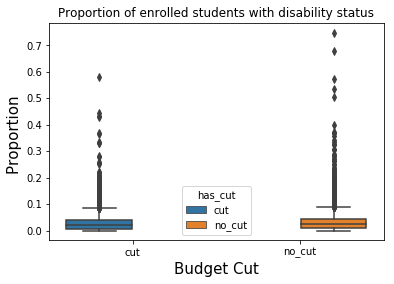

In [105]:


fig, ax = plt.subplots()
sns.boxplot(x="has_cut", y=prop_name,hue="has_cut", data=disability_fiscal,ax =ax)  # RUN PLOT  
plt.xlabel('Budget Cut', fontsize=15)
plt.ylabel('Proportion ', fontsize=15)
plt.title('Proportion of enrolled students with disability status' )
plt.show()

_As we can the distrubtion of proportion of enrolled students for districts with cut and without is almost similar.For Districts without cut ,some districts are higher proportion than districts with cut in the higher end of the whisker_

**Problem 4**


_For this question , I chose to critique on the strategy used by Manvita Markala.They identified states that have a surplus amount (Total Revenue - Total Expenditure) that is high enough and in turn also higher than the individual states' federal revenue itself and pulled this amount worth the federal revenue from those states until it reaches 8340411300.0.
It is interesting and sensible to penalize those states which have surplus, as it does not hurt any of their expenditure .
In fact , i realized this to be more fair enough than the strategy i employed (i.e., cut the revenue proportional to the federal revenue that each school district is receieving) , where I missed the point that those districts that are receieving high federal revenue might well have  proportional expenditure to support themselves and but this strategy is not as unfair as of uniform cuts across all school districts but does not take expenditure into account._


**Problem 5**

I want to talk about MapReduce+Hadoop special topic lecture . As i have taken this course last year, I could not understand the concepts discussed as well as to revise the basic concepts like architecture,filesystem.
As we always just not build the models but built models that are also scalable , knowing these concepts helped me in my academic projects .